# Домашнее задание к семинару 02 (HW02)

#### ЗАДАЧИ:

1. Импортировать необходимые библиотеки:
   - `pandas` (обязательно),
   - при необходимости `numpy`,
   - `matplotlib.pyplot` для визуализации.
   Загрузить учебный датасет в `pandas.DataFrame` с помощью `pd.read_csv` (или другого подходящего метода).
   Вывести:
   - первые строки датасета (`head()`),
   - информацию о столбцах и типах (`info()`),
   - базовые описательные статистики (`describe()` или аналог).

#### Пропуски, дубликаты и базовый контроль качества

2. Посчитать долю пропусков в каждом столбце (например, через `isna().mean()` или аналог).
   Проверить наличие полностью дублирующих строк (через `duplicated()`).
   Найти и вывести «подозрительные» случаи, исходя из смысла датасета. Примеры:
   - отрицательные значения в полях, где их не должно быть (количество, цена и т.п.);
   - нереалистичные значения (например, возраст > 100, нулевой доход при ненулевых количествах и т.п.);
   - другие логические противоречия, характерные для конкретного датасета.
   Кратко (1-2 абзаца) описать текстом, какие проблемы качества данных были обнаружены.

#### Базовый EDA: группировки, агрегаты и частоты

3. Посчитать частоты для одной или двух категориальных переменных (например, `value_counts()` для столбца с категорией/страной/классом).
   Выполнить хотя бы одну осмысленную группировку с агрегатами через `groupby`:
   - например, среднее и сумму по количественным признакам в разрезе категорий.
   При необходимости ввести дополнительные «коридоры» (bins) или группировки (например, возрастные группы, диапазоны значений и т.п.).
   Кратко (1-2 абзаца) описать текстом основные наблюдения:
   - какие категории доминируют,
   - как отличаются группы по средним значениям,
   - есть ли неожиданные эффекты.

### Визуализация данных в Matplotlib

В том же ноутбуке `HW02.ipynb` нужно построить как минимум:

4. **Одну гистограмму** для количественного признака:
   - осмысленный выбор числа корзин (`bins`),
   - подписи осей и заголовок.

   **Один боксплот (boxplot)** для количественного признака:
   - можно как общий, так и по группам (например, по категориям),
   - подписи оси и заголовок.

   **Один scatter plot** (диаграмма рассеяния) для пары количественных признаков:
   - подписи обеих осей,
   - заголовок,
   - при желании можно добавить цвет/легенду для различения категорий.

   Сохранить **минимум один** из построенных графиков в папку `homeworks/HW02/figures/`:
   - использовать `plt.savefig(...)` или аналог;
   - убедиться, что файл действительно появляется в репозитории и может быть открыт отдельно от ноутбука.

Желательно снабдить графики краткими текстовыми комментариями:

- что именно показано;
- какие выводы можно сделать.

### Опциональная часть: мостик к проекту

Опциональная (но рекомендованная) часть для тех, кто уже определился с темой проекта и имеет или может сгенерировать данные.

1. В папке `project/` создать (если ещё нет) папку `notebooks/`.
2. Создать ноутбук `project/notebooks/eda_v1.ipynb`.
3. В этом ноутбуке:
   - загрузить небольшой фрагмент будущих проектных данных (или реалистичный синтетический пример, если «боевые» данные пока недоступны);
   - выполнить минимум 3 простых проверки качества:
     - пропуски,
     - дубликаты,
     - подозрительные значения;
   - сделать 2-3 базовых графика (hist/boxplot/scatter) для ключевых признаков;
   - добавить 3-5 коротких текстовых наблюдений о данных.

### ПЕРВАЯ ЧАСТЬ 

In [2]:
import pandas as pd 
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize']=8,5                       
import numpy as np
import matplotlib.pyplot as plt
import os
%config InlineBackend.figure_format= 'svg'

data = pd.read_csv('S02-hw-dataset.csv') 
data.head(10)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [4]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


### ВТОРАЯ ЧАСТЬ

In [5]:
miss = data.isna().mean()     #доля пропусков в каждом столбце
print(miss*100)

user_id      0.000000
age          4.878049
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64


In [6]:
n_dublic = data.duplicated().sum()
print("Число полных дубликатов:", n_dublic)

dublic = data[data.duplicated()]
dublic

Число полных дубликатов: 1


,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [7]:
#Нужно проверить возраст(<0 или >100), отрицательные кол-ва покупок и выручки, нулевая выручка при положительном кол-ве покупок и наоборот
age = data[(data["age"] < 0)| (data["age"] > 100)]
age          #подозрительный возраст

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [8]:
#отрицательные покупки и выручка
negative_pur = data[data["purchases"]<0]
negative_rev = data[data["revenue"]<0]
negative_pur    #отрицательные покупки


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [9]:
negative_rev    #отрицательная выручка

,user_id,age,country,purchases,revenue


In [10]:
#Несоответствием покупок и выручки
rp = data[(data["revenue"] == 0) & (data["purchases"] > 0)]
pv = data[(data["purchases"] == 0) & (data["revenue"] > 0)]
rp              #Кол-во покупок 4, а выручка 0

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [11]:
pv

,user_id,age,country,purchases,revenue


В данных присутствуют пропуски в признаке age, которые требуют корректировки. Обнаружен один полный дубликат записи (пользователь с user_id = 10), который необходимо удалить, чтобы не искажать статистику.

Также найдены логические несоответствия: у пользователя с user_id = 6 возраст равен 120 годам и количество покупок отрицательное (purchases = -1), что выглядит как ошибка ввода. У пользователя с user_id = 11 количество покупок положительное (purchases = 4), но выручка равна нулю, что тоже может свидетельствовать о некорректных данных.

### ТРЕТЬЯ ЧАСТЬ

In [12]:
# абсолютные частоты
country_counts = data["country"].value_counts()

# относительные (в %)
country_per = data["country"].value_counts(normalize=True)*100
country_counts

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [13]:
country_per

country
RU    31.707317
FR    29.268293
US    19.512195
DE    14.634146
CN     4.878049
Name: proportion, dtype: float64

In [14]:
#cоберём в одну таблицу абсолютные и относительные частоты по странам
country_stats = pd.concat(          
    [country_counts,               
     country_per.round(2)],         
    axis=1                          # соединяем ПО СТОЛБЦАМ (axis=1)
)

country_stats.columns = ["count", "percent"]  
country_stats                           

,count,percent
country,,
RU,13,31.71
FR,12,29.27
US,8,19.51
DE,6,14.63
CN,2,4.88


In [15]:
bins = [0, 15, 25, 35, 45, 55, 65, 75, 85, 100]                                                 #границы интервалов возрастов
labels = ["<=14", "15-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85+"]         #категории возрастных групп

data["age_group"] = pd.cut(         #новый столбец
    data["age"],
    bins=bins,
    labels=labels,
    include_lowest=True             #включаем самое маленькое значение (0) в первый интервал
)
#Сколько наблюдений приходится на каждую возрастную группу
age_group_c = data["age_group"].value_counts(dropna=True)      #Не считаем строки, где данных нет
age_group_c


age_group
15-24    11
25-34    11
45-54     8
35-44     6
<=14      1
55-64     1
65-74     0
75-84     0
85+       0
Name: count, dtype: int64

In [16]:
#Группировка с агрегатами groupby по странам
by_c = (
    data
    .groupby("country")[["purchases", "revenue"]]       #группировка строк по столбцам
    .agg(                                               #Имена столбцов с функциями: среднее значение(mean) и сумма(sum)
        mean_purchases=("purchases", "mean"),
        sum_purchases=("purchases", "sum"),
        mean_revenue=("revenue", "mean"),
        sum_revenue=("revenue", "sum"),
    )
)
by_c

,mean_purchases,sum_purchases,mean_revenue,sum_revenue
country,,,,
CN,4.500000,9,1054.000000,2108
DE,6.500000,39,1445.500000,8673
FR,4.250000,51,675.916667,8111
RU,4.769231,62,790.076923,10271
US,4.625000,37,557.375000,4459


In [17]:
by_age = (
    data
    .groupby("age_group",observed=True)[["purchases", "revenue"]]   #группировка строк по столбцам. observed=True-убирает значения, в которых данных нет, False будет показывать всевозможные категории, даже если данных нет
    .agg(
        mean_purchases=("purchases", "mean"),                       #Имена столбцов с функциями: среднее значение(mean) и сумма(sum)    
        sum_purchases=("purchases", "sum"),
        mean_revenue=("revenue", "mean"),
        sum_revenue=("revenue", "sum"),
    )
)
by_age

,mean_purchases,sum_purchases,mean_revenue,sum_revenue
age_group,,,,
<=14,8.000000,8,1488.000000,1488
15-24,4.909091,54,629.090909,6920
25-34,4.909091,54,946.818182,10415
35-44,4.833333,29,1106.000000,6636
45-54,4.000000,32,594.875000,4759
55-64,7.000000,7,693.000000,693


В выборке доминируют пользователи из стран RU(31%) и FR(29%), тогда как страны CN представлены значительно реже(4%). По средним значениям выручки и количества покупок выделяются покупатели из DE — у них наибольшее среднее число покупок, наибольшая средняя выручка, а покупатели из RU суммарно совершили наибольшее кол-во покупок и их суммарная выручка стала наибольшей. В стране CN наименьший показатель суммарных покупок и выручки, а в US средняя выручка самая минимальная.

У возрастных групп больше всего пользователей приходится на категории 15-24 и 25-34. Группы <=14 и 35-44 показывают наибольшую среднюю выручку, группы 15-24 и 25-34 наибольшее число покупок, в то время как у групп 55-64 и 45-54 эти показатели ниже. В старших возрастных группах можно заметить неправильно введенные значения, что меняет статистику.

### ЧЕТВЕРТАЯ ЧАСТЬ

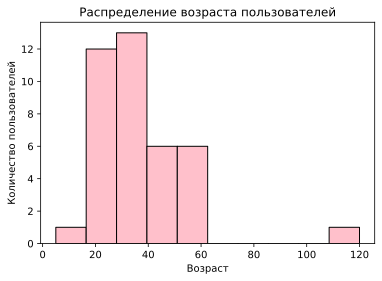

In [18]:
#Создаем папку figures для графиков в папку homeworks/HW02/figures
#Гистограмма возраста
plt.figure(figsize=(6, 4))                                                    #размер гистограммы
plt.hist(data["age"].dropna(), bins=10, edgecolor="black", color="pink")      # строим гистограмму возраста,bins=10 означает, что интервал будет разбит на 10 корзин
                                                        
plt.xlabel("Возраст")
plt.ylabel("Количество пользователей")
plt.title("Распределение возраста пользователей")

# сохраняем рисунок в файл
plt.savefig("figures/age_histogram.png", dpi=500)
plt.show() 

<Figure size 700x400 with 0 Axes>

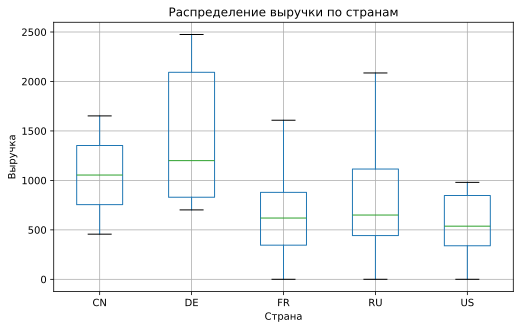

In [19]:
#BOXLOT выручки по странам

plt.figure(figsize=(7, 4))

# boxplot с группировкой по стране
data.boxplot(column="revenue", by="country")

plt.title("Распределение выручки по странам")   
plt.suptitle("")                                # убираем автоматический верхний заголовок от pandas
plt.xlabel("Страна")
plt.ylabel("Выручка")

plt.savefig("figures/boxplot.png", dpi=500)
plt.show()


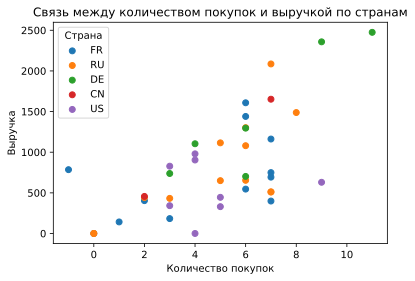

In [20]:
#SCATTER PLOT: связь между кол-вом покупок и выручкой
plt.figure(figsize=(6, 4))

for country in data["country"].unique():        #даёт список уникальных значений из стран
    subset = data[data["country"] == country]   #датафрейм только с пользователями из одной конкретной страны
    plt.scatter(
        subset["purchases"],                    #кол-во покупок 
        subset["revenue"],                      #выручка
        alpha=1,
        label=country                           #подпись для этой группы точек  
    )

plt.xlabel("Количество покупок")
plt.ylabel("Выручка")
plt.title("Связь между количеством покупок и выручкой по странам")
plt.legend(title="Страна")                      #разные цвета для стран

plt.savefig("figures/scatter_plot.png", dpi=500)
plt.show()


### ПЯТАЯ ЧАСТЬ
Пока думаю над идей проекта